In [1]:
!pip install qiskit
!pip install qiskit-machine-learning

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 17.9 MB 344 kB/s 
     |████████████████████████████████| 237 kB 40.4 MB/s 
     |████████████████████████████████| 200 kB 51.8 MB/s 
     |████████████████████████████████| 53 kB 1.0 MB/s 
     |████████████████████████████████| 1.4 MB 45.7 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 943 kB 34.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 3.6 MB 44.1 MB/s 
     |████████████████████████████████| 112 kB 74.8 MB/s 
  Created wheel for qiskit: filename=qiskit-0.33.0-py3-none-any.whl size=11763 sha256=9c6b76f5e5ce7ce8f189d285044d28477e6af1a14502b1a93d437f5f670e2263
  Stored in directory: /root/.cache/pip/wheels/d4/60/ef/c49ae113df02818c4ade5fb6e2e89bb928625412eda0bb

In [48]:
import numpy as np

# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
#provider = IBMQ.load_account()

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

from IPython.display import clear_output

In [50]:
  #def get_noise_model():
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer import noise
noise_model = NoiseModel()
# Error probabilities
#prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.000   # 2-qubit gate

# Depolarizing quantum errors
#error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
#noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3', 'h', 'id', 'rz', 'sx', 'rx', 'ry'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
    
    #return noise_model

In [51]:
quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024)

In [52]:
#noise_model1 = get_noise_model()
quantum_instance_noise = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024, noise_model = noise_model)


In [53]:
# construct simple feature map
param_x = Parameter('x')
feature_map = QuantumCircuit(1, name='fm')
feature_map.ry(param_x, 0)
print(feature_map)

# construct simple ansatz
param_y = Parameter('y')
ansatz = QuantumCircuit(1, name='vf')
ansatz.ry(param_y, 0)
print(ansatz)
#ansatz.draw(output='mpl')
# construct QNN
regression_opflow_qnn = TwoLayerQNN(1, feature_map, ansatz, quantum_instance=quantum_instance)
regression_opflow_qnn_noise = TwoLayerQNN(1, feature_map, ansatz, quantum_instance=quantum_instance_noise)

   ┌───────┐
q: ┤ Ry(x) ├
   └───────┘
   ┌───────┐
q: ┤ Ry(y) ├
   └───────┘


In [54]:
# callback function that draws a live plot when the .fit() method is called
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [55]:
# callback function that draws a live plot when the .fit() method is called
objective_func_vals_noise = []
def callback_graph_noise(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals_noise.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals_noise)), objective_func_vals_noise)
    plt.show()

In [56]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(neural_network=regression_opflow_qnn,
                                   loss='l2',
                                   optimizer=L_BFGS_B(),
                                   callback=callback_graph)

In [57]:
# construct the regressor from the neural network
regressor_noise = NeuralNetworkRegressor(neural_network=regression_opflow_qnn_noise,
                                   loss='l2',
                                   optimizer=L_BFGS_B(),
                                   callback=callback_graph_noise)

In [ ]:
#from IPython.core.debugger import set_trace

In [58]:
#import sys
'''
sys.path.append("../Qiskit_Dynamic_Modelling")
sys.path.append("./modelQ")
sys.path.append("./dynamicsQ")
'''
sys.path.append("./sample_data")
from dataloader import *
train_data = np.load('/content/sample_data/train_dataset.npz')
train_inputs = train_data["input"]
train_labels = train_data["labels"]
X_inputs = train_inputs[:100]#50000]
y_labels = train_labels[:100]#50000]
#train_dataset = DynamicsDataset(train_inputs, train_labels)
train_dataset = DynamicsDataset(X_inputs, y_labels)

train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                                 batch_size=1,
                                                 shuffle=True,
                                                 collate_fn=DynamicsDataset.collate_fn,
                                                 pin_memory=True,
                                                 num_workers=1)
print(len(X_inputs))
print(len(y_labels))


100
100


In [59]:
from qiskit import transpile, assemble
class QuanvCircuit:
    """ 
    This class defines filter circuit of Quanvolution layer
    """    
    def __init__(self, kernel_size, backend, shots, threshold):
        # --- Circuit definition start ---
        self.n_qubits = kernel_size ** 2
        self._circuit = qiskit.QuantumCircuit(self.n_qubits)
        self.theta = [qiskit.circuit.Parameter('theta{}'.format(i)) for i in range(self.n_qubits)]

        for i in range(self.n_qubits):
            self._circuit.rx(self.theta[i], i)
        
        #self._circuit.barrier()
        self._circuit.measure_all()
        # ---- Circuit definition end ----
        self.backend   = backend
        self.shots     = shots
        self.threshold = threshold

    def run(self, data):
        # encoding data to parameters
        thetas = [data]
        
        param_dict = dict()
        for theta in thetas:
            for i in range(self.n_qubits):
                param_dict[self.theta[i]] = theta[i]
        param_binds = [param_dict]

        List = [thetas]
        t_qc = transpile(self._circuit,
                         self.backend)
        qobj = assemble(t_qc,
                        shots=self.shots,
                        parameter_binds = param_binds)
        job = self.backend.run(qobj)
        result = job.result().get_counts()

        # decoding the result
        counts = 0
        for key, val in result.items():
            cnt = sum([int(char) for char in key])
            counts += cnt * val
        
        probabilities = counts / (self.shots * self.n_qubits)
        
        return probabilities

In [60]:
backend = qiskit.Aer.get_backend('qasm_simulator')
filter_size = 2
circ = QuanvCircuit(filter_size, backend, 100, 127)
#data = torch.tensor([[0, 200], [100, 255]])
#data = torch.tensor([-2.8351264, 1.3314428,  -0.18492305,  0.00792312]).numpy()#1,2,3,4]).numpy()
data = [-2.8351264,  1.3314428,  -0.18492305,  0.00792312]

#
print(data)
#print(data.size())
print(circ.run(data))

circ._circuit.draw()#output='mpl')

[-2.8351264, 1.3314428, -0.18492305, 0.00792312]
0.3325


┌────────────┐ ░ ┌─┐         
   q_0: ┤ Rx(theta0) ├─░─┤M├─────────
        ├────────────┤ ░ └╥┘┌─┐      
   q_1: ┤ Rx(theta1) ├─░──╫─┤M├──────
        ├────────────┤ ░  ║ └╥┘┌─┐   
   q_2: ┤ Rx(theta2) ├─░──╫──╫─┤M├───
        ├────────────┤ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ Rx(theta3) ├─░──╫──╫──╫─┤M├
        └────────────┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════╩══╩══╩══╩═
                          0  1  2  3

In [61]:
import qiskit
backend = qiskit.Aer.get_backend('qasm_simulator')
filter_size = 2
circ = QuanvCircuit(filter_size, backend, 100, 127)

In [62]:
#for (X_train, y_train) in train_dataloader:
print('Loading Training data')
xVal = []
yVal = []
#count = 0
for (X_train, y_train) in train_dataloader:
    #print('Training Starts')
    #print(X_train.detach().numpy()[0])
    #print(y_train.detach().numpy()[0])
    x = circ.run(X_train.detach().numpy()[0])
    y = circ.run(y_train.detach().numpy()[0])
    #regressor.fit(x, y)
    
    xVal.append([x])
    yVal.append(y)
    '''
    count += 1
    
    if (count == 50000):
        print('Loaded data :',count)
        break
    '''
print('x data',len(xVal))
print('y data',len(yVal))


Loading Training data


./sample_data/dataloader.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  batch_x = torch.as_tensor(batch_x)


x data 100
y data 100


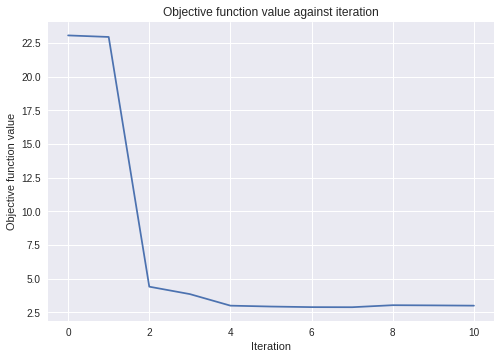

Total Training Time : 11.300572633743286


In [63]:
#print(torch.tensor(xVal).detach().numpy())
#print(torch.tensor(yVal).detach().numpy())
import time
print('Training Started')
startTime = time.time()
regressor.fit(torch.tensor(xVal).detach().numpy(), torch.tensor(yVal).detach().numpy())
print('Total Training Time :', (time.time()-startTime))

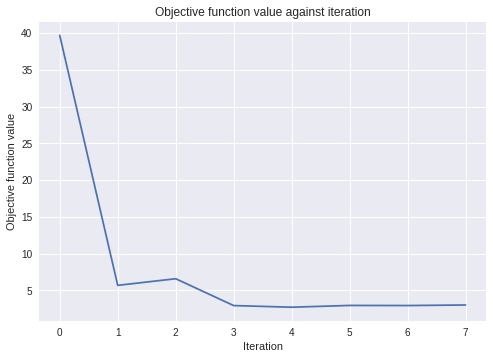

Total Training Time : 7.9428441524505615


In [64]:
#print(torch.tensor(xVal).detach().numpy())
#print(torch.tensor(yVal).detach().numpy())
import time
print('Training Started')
startTime = time.time()
regressor_noise.fit(torch.tensor(xVal).detach().numpy(), torch.tensor(yVal).detach().numpy())
print('Total Training Time :', (time.time()-startTime))

In [65]:
# score the result
regressor.score(torch.tensor(xVal).detach().numpy(), torch.tensor(yVal).detach().numpy())

-0.8868040210846102

In [66]:
# score the result
regressor_noise.score(torch.tensor(xVal).detach().numpy(), torch.tensor(yVal).detach().numpy())

-0.8087757357649599

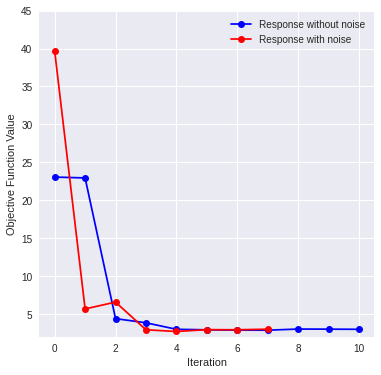

In [71]:
import matplotlib.pyplot as plt

plt.style.use("seaborn")
fig, (ax1) = plt.subplots(figsize=(6,6))

ax1.plot(objective_func_vals, "-ob", label="Response without noise")
ax1.plot(objective_func_vals_noise, "-or", label="Response with noise")

ax1.set_ylabel("Objective Function Value")
ax1.set_ylim([2, 45])
ax1.set_xlabel("Iteration")
ax1.legend()#loc=2, prop = {'size': 10})